In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score , precision_score , recall_score , f1_score


In [18]:
data = pd.read_csv('randsam_BABY.csv')

In [19]:
data.describe()

,Timestamp,volData,currentData,batTempData,socData,sohData,motTempData,speedData
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9999.00000,5.921111,0.400658,28.247670,83.768586,90.346141,29.641540,61.073900
std,5773.79136,0.451182,0.147206,0.491303,9.119213,7.534729,0.552113,1.435007
min,0.00000,5.346880,0.017420,26.700000,70.001566,80.351560,28.600000,59.000000
25%,4999.50000,5.617560,0.291780,28.000000,75.584955,85.292970,29.200000,60.000000
50%,9999.00000,5.720720,0.465977,28.100000,82.485827,87.011720,29.500000,61.000000
75%,14998.50000,6.236320,0.500818,28.500000,92.191512,95.605470,30.000000,62.000000
max,19998.00000,7.125800,0.600982,29.300000,99.998456,110.429690,31.000000,63.000000


In [20]:
data.head()

,Timestamp,volData,currentData,batTempData,socData,sohData,motTempData,speedData
0,0,5.47580,0.548723,28.0,72.252736,82.92969,29.7,59
1,2,5.73360,0.461622,28.5,80.198973,87.22656,29.8,61
2,4,6.00428,0.370170,28.0,84.026626,91.73828,29.8,59
3,6,6.17188,0.313555,28.0,95.754465,94.53125,29.7,60
4,8,5.60468,0.505173,28.0,73.922358,85.07812,29.4,62


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    10000 non-null  int64  
 1   volData      10000 non-null  float64
 2   currentData  10000 non-null  float64
 3   batTempData  10000 non-null  float64
 4   socData      10000 non-null  float64
 5   sohData      10000 non-null  float64
 6   motTempData  10000 non-null  float64
 7   speedData    10000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 625.1 KB


In [22]:
data.shape

(10000, 8)

In [23]:
data.dropna()

,Timestamp,volData,currentData,batTempData,socData,sohData,motTempData,speedData
0,0,5.47580,0.548723,28.0,72.252736,82.92969,29.7,59
1,2,5.73360,0.461622,28.5,80.198973,87.22656,29.8,61
2,4,6.00428,0.370170,28.0,84.026626,91.73828,29.8,59
3,6,6.17188,0.313555,28.0,95.754465,94.53125,29.7,60
4,8,5.60468,0.505173,28.0,73.922358,85.07812,29.4,62
...,...,...,...,...,...,...,...,...
9995,19990,5.61756,0.500818,28.5,74.888768,85.29297,29.4,63
9996,19992,7.03556,0.021775,28.0,97.570555,108.92578,30.9,62
9997,19994,5.46288,0.553077,28.0,76.390056,82.71484,29.7,59
9998,19996,5.64336,0.492107,28.5,88.802458,85.72266,29.2,63


In [24]:
x= data[["Timestamp", "volData", "currentData"]]
y = data[["batTempData", "socData", "sohData", "motTempData", "speedData"]]

In [25]:
scaler = StandardScaler()
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)


In [26]:
x_train , x_test , y_train , y_test = train_test_split (x_scaled,y_scaled,test_size=0.2,random_state = 42)

In [27]:
models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(random_state=42),
    "Random Forest" : RandomForestRegressor(random_state = 42 , n_estimators = 25)
}

In [28]:
metrics = []

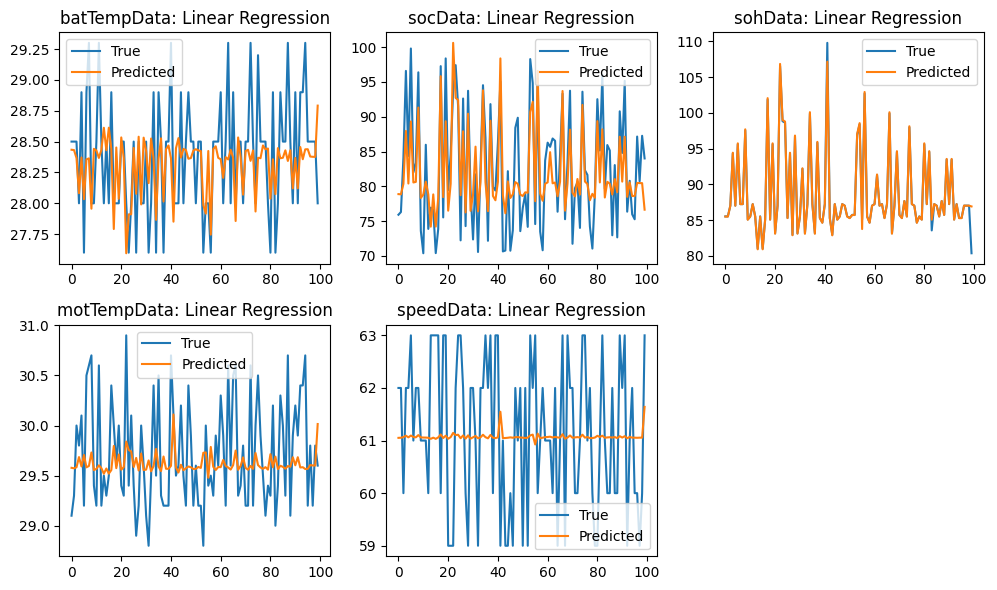

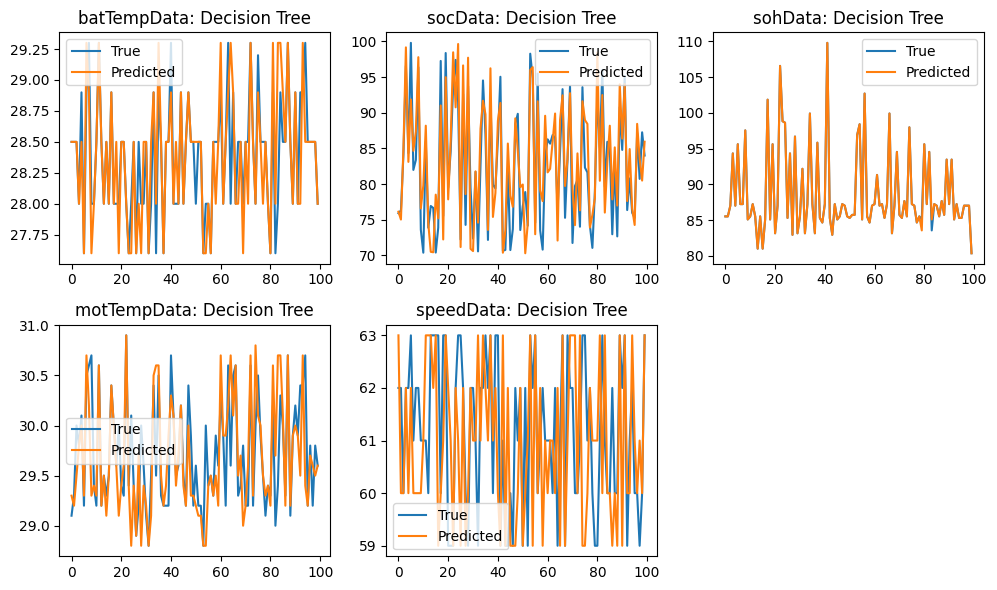

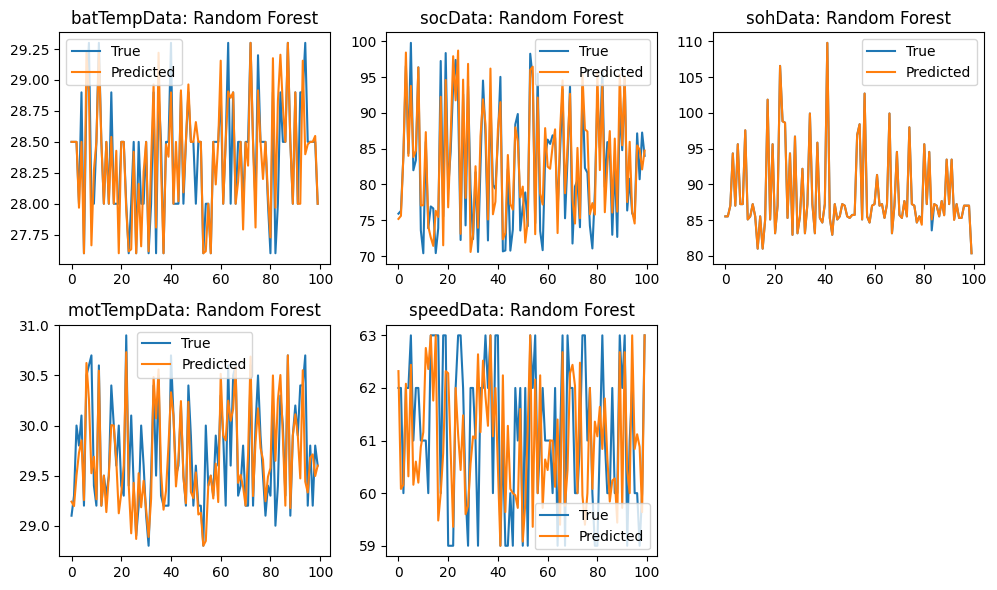

               Model  Mean Squared Error  R2 Score  Accuracy  Precision  \
0  Linear Regression            0.591655  0.410643    0.7767   0.775748   
1      Decision Tree            0.555088  0.446519    0.8420   0.841864   
2      Random Forest            0.404619  0.596512    0.8437   0.844899   

   Recall  F1 Score  
0  0.7767  0.775917  
1  0.8420  0.841924  
2  0.8437  0.844063  


In [ ]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Convert predictions to binary classification for metrics like accuracy, precision, recall, and F1
    y_test_binary = (y_test > 0).astype(int)
    y_pred_binary = (y_pred > 0).astype(int)

    accuracy = accuracy_score(y_test_binary.flatten(), y_pred_binary.flatten())
    precision = precision_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted', zero_division=0)
    recall = recall_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted', zero_division=0)
    f1 = f1_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted', zero_division=0)

    metrics.append({"Model": name,"Mean Squared Error": mse,"R2 Score": r2,"Accuracy": accuracy,"Precision": precision,"Recall": recall,"F1 Score": f1,})

    # Inverse transform for better interpretation in plots
    y_test_inv = scaler_y.inverse_transform(y_test)
    y_pred_inv = scaler_y.inverse_transform(y_pred)

    plt.figure(figsize=(10, 6))
    for i, col in enumerate(y.columns):
        plt.subplot(2, 3, i + 1)
        plt.plot(y_test_inv[:100, i], label="True")
        plt.plot(y_pred_inv[:100, i], label="Predicted")
        plt.title(f"{col}: {name}")
        plt.legend()
    plt.tight_layout()
    plt.show()

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


In [33]:
sample_input = np.array([[15598, 6.23632, 0.29178]])

sample_input_scaled = scaler_x.transform(sample_input)


sample_predictions = {}

# Predict with each model
for name, model in models.items():
    # Predict and inverse transform the result
    sample_pred_scaled = model.predict(sample_input_scaled)
    sample_pred = scaler_y.inverse_transform(sample_pred_scaled)
    sample_predictions[name] = sample_pred.flatten()

# Display predictions
print("Predictions for sample input [9262, 5.61756, 0.500818]:")
for model_name, prediction in sample_predictions.items():
    print(f"{model_name}: {prediction}")

Predictions for sample input [9262, 5.61756, 0.500818]:
Linear Regression: [28.03545529 89.33936771 95.72844194 29.7106032  61.09250176]
Decision Tree: [27.6       98.7325574 95.60547   29.3       59.       ]
Random Forest: [27.6        97.50505551 95.60547    29.3        59.        ]


c:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
